In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import Libraries
import csv
from csv import reader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
#Load data using pandas
nlp_data = pd.read_csv('/content/drive/My Drive/data_sample/bbc-text.csv')
nlp_data.head(5)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
#Arrange data by categorywise and count
df_category_wise = nlp_data.groupby('category',axis=0).count()
df_category_wise.rename(columns={'text':'Total'},inplace=True)
print(df_category_wise)

               Total
category            
business         510
entertainment    386
politics         417
sport            511
tech             401


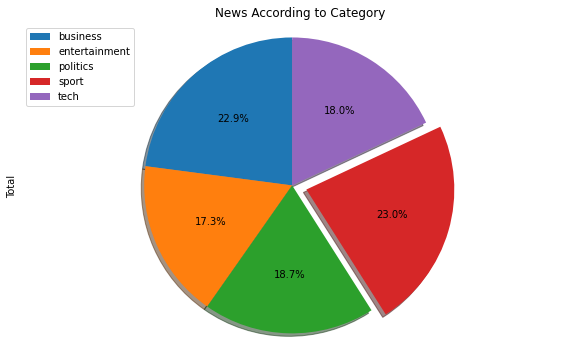

In [5]:
#pie chart that shows news percentage according to category
explode_list = [0,0,0,0.1,0]
df_category_wise['Total'].plot(
    kind='pie',
    figsize=(10,6),
    autopct = '%1.1f%%',
    labels = None,
    explode = explode_list,
    startangle=90,
    shadow=True,
)
plt.title('News According to Category')
plt.axis('equal')
plt.legend(labels=df_category_wise.index, loc='upper left')
plt.show()

In [6]:
#From csv file list out news and category
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
category = []
news =[]
with open('/content/drive/My Drive/data_sample/bbc-text.csv','r') as csvfile:
    reader = csv.reader(csvfile,delimiter=',')
    next(reader)
    for row in reader:
        category.append(row[0])
        news.append(row[1])
print(category[1])
print(news[1])
print(len(news))

business
worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am aware of   mr myers replied.  did you ever know mr ebbers to make an accounting entry into worldcom books   mr weingarten pressed.  no   replied the witness. mr myers has admitted that he ordered false accounting entries at the request of former worldcom chief

In [7]:
#Remove the stopwords from news-text
news_without_stopwords = []
#Remove Stop words
for sentence in news: 
    for word in stopwords:
        token = ' ' + word + ' '
        sentence = sentence.replace(token, " ")
        sentence = sentence.replace("  "," ")
    news_without_stopwords.append(sentence)
print(news_without_stopwords[1])

worldcom boss left books alone former worldcom boss bernie ebbers accused overseeing $11bn (£5.8bn) fraud never made accounting decisions witness told jurors. david myers made comments questioning defence lawyers arguing mr ebbers not responsible worldcom s problems. phone company collapsed 2002 prosecutors claim losses hidden protect firm s shares. mr myers already pleaded guilty fraud assisting prosecutors. monday defence lawyer reid weingarten tried distance client allegations. cross examination asked mr myers ever knew mr ebbers make accounting decision . not aware mr myers replied. ever know mr ebbers make accounting entry worldcom books mr weingarten pressed. no replied witness. mr myers admitted ordered false accounting entries request former worldcom chief financial officer scott sullivan. defence lawyers trying paint mr sullivan admitted fraud will testify later trial mastermind behind worldcom s accounting house cards. mr ebbers team meanwhile looking portray affable boss adm

In [8]:
#Stemming Process
stemmer = PorterStemmer()
stemmered_news_list = []
for news in news_without_stopwords:
    stemmered_news =''
    word = word_tokenize(news)
    for w in word:
        stem_word = stemmer.stem(w)
        stemmered_news = stemmered_news + " " + stem_word
    stemmered_news_list.append(stemmered_news)
print(stemmered_news_list[1])



 worldcom boss left book alon former worldcom boss berni ebber accus overse $ 11bn ( £5.8bn ) fraud never made account decis wit told juror . david myer made comment question defenc lawyer argu mr ebber not respons worldcom s problem . phone compani collaps 2002 prosecutor claim loss hidden protect firm s share . mr myer alreadi plead guilti fraud assist prosecutor . monday defenc lawyer reid weingarten tri distanc client alleg . cross examin ask mr myer ever knew mr ebber make account decis . not awar mr myer repli . ever know mr ebber make account entri worldcom book mr weingarten press . no repli wit . mr myer admit order fals account entri request former worldcom chief financi offic scott sullivan . defenc lawyer tri paint mr sullivan admit fraud will testifi later trial mastermind behind worldcom s account hous card . mr ebber team meanwhil look portray affabl boss admiss pe graduat economist . whatev abil mr ebber transform worldcom rel unknown $ 160bn telecom giant investor darl

In [9]:
#Tokenize News without Stemming
tokenizer  = Tokenizer(oov_token = "<OOV>")
tokenizer.fit_on_texts(news_without_stopwords)
word_index = tokenizer.word_index
news_sequnces = tokenizer.texts_to_sequences(news_without_stopwords)
#print(word_index)
print("Length without stemming process"+str(len(word_index)))
print(news_sequnces[1])

Length without stemming process29714
[1621, 611, 252, 1641, 1418, 127, 1621, 611, 5802, 1655, 662, 6975, 5219, 2003, 1823, 757, 294, 33, 2159, 1279, 4420, 28, 5480, 334, 6143, 33, 806, 4273, 858, 1878, 3854, 6, 1655, 5, 1436, 1621, 2, 383, 166, 53, 4274, 628, 2263, 604, 1856, 3049, 1204, 70, 2, 298, 6, 6143, 113, 2810, 1178, 757, 9757, 2263, 455, 858, 1580, 5001, 9758, 1265, 2446, 3517, 1780, 885, 9759, 458, 6, 6143, 373, 1474, 6, 1655, 27, 2159, 198, 5, 1581, 6, 6143, 3855, 373, 185, 6, 1655, 27, 2159, 1879, 1621, 1641, 6, 9758, 6520, 24, 3855, 4420, 6, 6143, 764, 2523, 2083, 2159, 4135, 3399, 127, 1621, 122, 318, 1598, 1692, 1315, 858, 1878, 497, 8821, 6, 1315, 764, 757, 4, 10926, 260, 559, 14977, 374, 1621, 2, 2159, 285, 672, 6, 1655, 153, 737, 320, 8105, 19527, 611, 5481, 10927, 7524, 1437, 2304, 8822, 6, 1655, 5803, 1621, 6521, 4603, 14978, 1654, 622, 3629, 7525, 568, 2218, 1621, 2, 383, 6144, 101, 504, 904, 1654, 2811, 10928, 584, 70, 1622, 4274, 1143, 243, 8106, 277, 38, 765, 24

In [10]:
#Tokenize News with Stemming
stemmed_tokenizer  = Tokenizer(oov_token = "<OOV>")
stemmed_tokenizer.fit_on_texts(stemmered_news_list)
word_index = stemmed_tokenizer.word_index
news_sequnces = stemmed_tokenizer.texts_to_sequences(stemmered_news_list)
#print(word_index)
print("Length with stemming process " + str(len(word_index)))
print(news_sequnces[1])

Length with stemming process 21330
[1567, 622, 345, 390, 1407, 190, 1567, 622, 4549, 1585, 598, 3482, 4152, 1865, 1717, 887, 387, 52, 355, 207, 2109, 45, 4153, 442, 4786, 52, 443, 395, 924, 971, 583, 7, 1585, 5, 356, 1567, 2, 180, 104, 33, 1699, 767, 1718, 107, 798, 2633, 426, 37, 2, 114, 7, 4786, 175, 2016, 1217, 887, 1342, 1718, 540, 924, 971, 3996, 7256, 112, 2075, 1866, 820, 863, 2017, 254, 7, 4786, 501, 1454, 7, 1585, 19, 355, 207, 5, 1198, 7, 4786, 2634, 501, 198, 7, 1585, 19, 355, 1455, 1567, 390, 7, 7256, 716, 38, 2634, 2109, 7, 4786, 687, 416, 1923, 355, 1455, 1744, 190, 1567, 170, 388, 154, 1633, 1318, 924, 971, 112, 2703, 7, 1318, 687, 887, 4, 7257, 349, 541, 6602, 483, 1567, 2, 355, 253, 382, 7, 1585, 179, 882, 70, 2635, 14072, 622, 3377, 8032, 3718, 979, 2076, 1083, 7, 1585, 2483, 1567, 1199, 3613, 10887, 1246, 646, 783, 5350, 688, 1688, 1567, 2, 180, 2769, 144, 396, 137, 1246, 1619, 1084, 689, 37, 200, 1699, 888, 336, 6104, 367, 63, 799, 336, 189, 7, 1585, 541, 71, 18, 22

In [11]:
#Tokenize Category
category_tokenizer  = Tokenizer()
category_tokenizer.fit_on_texts(category)
category_word_index = category_tokenizer.word_index
category_sequnces = category_tokenizer.texts_to_sequences(category)
print(category_word_index)
print(category_sequnces[0])
print(category_sequnces[1])

{'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}
[4]
[2]
